In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import confusion_matrix, accuracy_score

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
columns = ['target', 'ids', 'date', 'flag' ,'user', 'text']
path = '/Users/ajay/Downloads/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(path, names = columns, encoding='latin-1')


In [3]:
df = df.sample(n=50000,random_state=100).reset_index(drop=True)
df.head()

,target,ids,date,flag,user,text
0,4,1686122683,Sun May 03 03:52:46 PDT 2009,NO_QUERY,spunkgirl,@nicholasmw 1 day u will find that girl worry
1,0,2174460051,Sun Jun 14 22:35:53 PDT 2009,NO_QUERY,Bubbles_Fly,there is nothing on tv and im so desperate to ...
2,0,1795849965,Thu May 14 08:28:27 PDT 2009,NO_QUERY,ktfry246,Very excited that greys is on tonight. Not so ...
3,4,1933034865,Tue May 26 22:49:43 PDT 2009,NO_QUERY,Sheng07,2pm's again and again is a great song. Nichkhu...
4,0,1976523804,Sat May 30 18:21:19 PDT 2009,NO_QUERY,amberself,My teeth hurt


In [4]:
df.shape

(50000, 6)

# Data Cleaning and Preprocessing

In [5]:
df.target = df.target.replace(4,1)

In [6]:
def clean_text(text):
    text = text.lower() #lowercase
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if not t in stopwords] #remove stopwords
    tokens = [t for t in tokens if t.isalnum()] #remove punctuation
    text_clean = " ".join(tokens)
    
    return text_clean

#clean text 
df['text'] = [clean_text(text) for text in df['text']]

# Splitting data into Training and Testing

In [7]:
#train test split
train = df[0:40000]
test = df[40000:50000].reset_index(drop=True)

# Creating Feature Matrix

In [8]:
# Create count vectoriser 
vectorizer = CountVectorizer(ngram_range=(1, 2)
                            ,max_features=1000)

# Transform training corpus into feature matrix
X = vectorizer.fit_transform(train['text'])
feature_names = vectorizer.get_feature_names()

x_train = pd.DataFrame(data=X.toarray(),columns=feature_names)
y_train = train['target']

/Users/ajay/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Transform testing corpus into feature matrix
X = vectorizer.transform(test['text'])

x_test = pd.DataFrame(data=X.toarray(),columns=feature_names)
y_test = test['target']

In [10]:
# Min-Max scalling
x_max = x_train.max()
x_min = x_train.min()

x_train = (x_train - x_min)/x_max
x_test = (x_test - x_min)/x_max

# Function to plot Confusion matrix

In [14]:
def conf_matrix(y_test,y_pred_lr):
    #create confusion matrix
    conf_matrix = confusion_matrix(y_test,y_pred_lr)
    conf_matrix = pd.DataFrame(data = conf_matrix,
                                  columns=['negative','positive'],
                                  index=['negative','positive'])

    #plot confusion matrix
    plt.figure(figsize=(5, 5), facecolor='w', edgecolor='k')
    sns.set(font_scale=1.5)
    sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
    plt.ylabel('Actual',size=20)
    plt.xlabel('Predicted',size=20)
    

# Random forest classifier

In [12]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0).fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
cmatrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.7109


In [19]:
f1_dt = f1_score(y_test, y_pred_rf, average='weighted')

print("F1 Score: {}".format(f1_dt))

F1 Score: 0.7108922547593571


In [22]:
precision_dt = precision_score(y_test, y_pred_rf, average='weighted')

# Calculate recall
recall_dt = recall_score(y_test, y_pred_rf, average='weighted')

# Print results

print("Precision: {}".format(precision_dt))
print("Recall: {}".format(recall_dt))

Precision: 0.7109159193058321
Recall: 0.7109


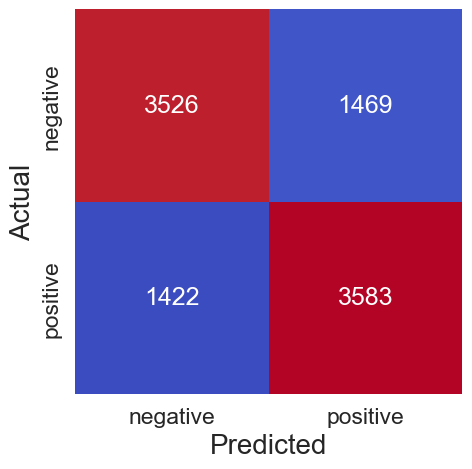

In [15]:
conf_matrix(y_test,y_pred_rf)

# Decision Tree Classifier

In [13]:
dt = DecisionTreeClassifier(random_state=0).fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
cmatrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.6721


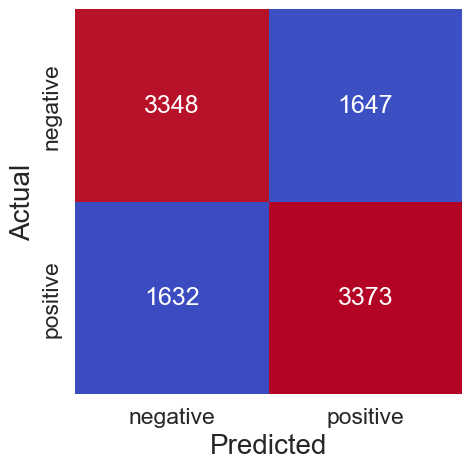

In [16]:
conf_matrix(y_test,y_pred_dt)

In [18]:
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print results

print("F1 Score: {}".format(f1_dt))

F1 Score: 0.6720987703673149


In [21]:
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Print results

print("Precision: {}".format(precision_dt))
print("Recall: {}".format(recall_dt))


Precision: 0.6721005652090434
Recall: 0.6721
